In [397]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
sys.path.append(sys.path[0]+'/../../NMRData')
from functions import *
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [398]:
def GrabSettingsAtIndex(j):
    import os
    import numpy as np
    import pandas as pd
    import re

    
    NMRFolders=os.listdir(NMRData)
    name=NMRData+'/'+NMRFolders[j]+'/Downstream Coil/Settings.dat'
    with open(name, 'r') as f:
        # read the contents of the file into a list
        lines = f.readlines()

    # remove newline characters from each element
    lines = [line.strip() for line in lines]

    # print the list

    result=[]
    for string in lines[4:11]:
        # split the string into key and value
        key, value = string.split(':')
        # strip leading and trailing whitespace from key and value
        key = key.strip()
        value = value.strip()
        # convert value to integer
        value = float(value)
        # add key and value to result list
        result.append([key, value])
    #print(lines[13])

    return result

nmrDates=np.load('nmrDates.npy')
nmrIndices=np.load('nmrIndices.npy')

In [399]:
NMRData=sys.path[0]+'/../../NMRData'

In [400]:
NMRFolders=os.listdir(NMRData)
#NMRData+'/'+NMRFolders[j]+'/Downstream Coil/Settings.dat'

In [401]:
#os.listdir(sys.path[0]+'/../../')

# Here, I bring in fits generated in the "LoadNMR" notebook

In [402]:
hunterFitsK2=np.load(sys.path[0]+'/../../NMRDataFits/HunterKin2.npy')
allFits=np.load(sys.path[0]+'/../../NMRDataFits/FitsInRange.npy')
allIndices=np.load(sys.path[0]+'/../../NMRDataFits/indicesInRange.npy')
allDates=np.load(sys.path[0]+'/../../NMRDataFits/datesInRange.npy')
nmrDateStrings=hunterFitsK2[0].astype(int).astype(str)

nmrDates=np.empty(0)
for i in nmrDateStrings:
    nmrDates=np.append(nmrDates,datetime.strptime(i,"%Y%m%d%H%M%S"))

pcFits=hunterFitsK2[1]
usFits=hunterFitsK2[2]
dsFits=hunterFitsK2[3]

In [403]:
len(nmrDates)

197

In [404]:
allDates

array(['20221025_171530', '20221022_231115', '20221031_155140',
       '20221103_035654', '20221030_171612', '20221024_014417',
       '20221021_180326', '20221031_153259', '20221022_230831',
       '20221022_222249', '20221029_075930', '20221102_230435',
       '20221101_203142', '20221103_005750', '20221020_171935',
       '20221024_134630', '20221020_233411', '20221101_134048',
       '20221103_063954', '20221101_011358', '20221028_220103',
       '20221027_045538', '20221021_192155', '20221025_041610',
       '20221029_151208', '20221022_043508', '20221027_085405',
       '20221102_190105', '20221021_062218', '20221102_024126',
       '20221026_071359', '20221102_215536', '20221103_045440',
       '20221030_194447', '20221019_210059', '20221101_223714',
       '20221103_021127', '20221031_133110', '20221022_214544',
       '20221101_063849', '20221019_223620', '20221026_045130',
       '20221101_071938', '20221023_200557', '20221103_042858',
       '20221108_100054', '20221020_1027

In [405]:
#Organizing indices to split up 1.2G/s sweep and 5G/s sweep
l=hunterFitsK2[0].astype(int).astype(str)
m=np.empty(0)
for i in range(0,len(l)):
    m=np.append(m,l[i][:8]+'_'+l[i][8:])
match=np.empty(0)
for i in range(0,len(m)):
    
    match=np.append(match,int(np.where(allDates==m[i])[0]))
    
    
matchingIndices=match.astype(int)
hunterFitsK2Indices=allIndices[matchingIndices]


# Here, I bring in EPR calibrations generated in the "LoadEPR" notebook

In [406]:
EPR=np.transpose(np.load(sys.path[0]+'/../../EPRArray/EPRCalibrationsV2.npy',allow_pickle=True))
EPRdates=EPR[0][0:23]
EPRpc=EPR[1][0:23]
EPRds=EPR[3][0:23]

eprDateStrings=EPR[0].astype(str)

eprDates=np.empty(0)
for i in eprDateStrings:
    eprDates=np.append(eprDates,datetime.strptime("2022"+i,"%Y%m%d%H%M"))

pcCals=EPR[1]
usCals=EPR[2]
dsCals=EPR[3]

In [407]:
len(EPRpc)

23

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0., 11.,  5.,  7.,  7.,
         2.,  1.,  1.,  0.,  1.,  3.,  4.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([1.        , 1.06666667, 1.13333333, 1.2       , 1.26666667,
        1.33333333, 1.4       , 1.46666667, 1.53333333, 1.6       ,
        1.66666667, 1.73333333, 1.8       , 1.86666667, 1.93333333,
        2.        , 2.06666667, 2.13333333, 2.2       , 2.26666667,
        2.33333333, 2.4       , 2.46666667, 2.53333333, 2.6       ,
        2.66666667, 2.73333333, 2.8       , 2.86666667, 2.93333333,
        3.        ]),
 <BarContainer object of 30 artists>)

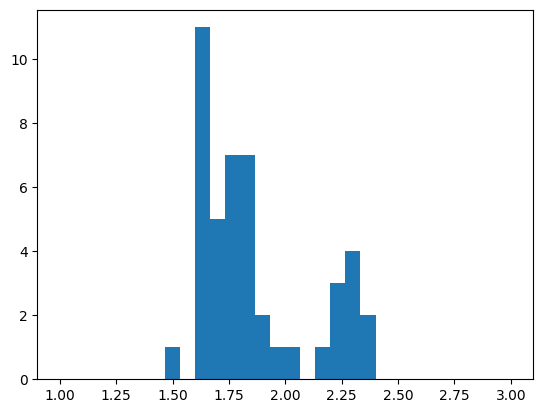

In [408]:
plt.hist(dsCals, bins=30, range=(1, 3))


In [409]:
len(eprDates)

49

In [410]:
Hdate2=hunterFitsK2[0].astype(int).astype(str)

In [411]:
Hdate2

array(['20221025171530', '20221022231115', '20221031155140',
       '20221103035654', '20221030171612', '20221024014417',
       '20221021180326', '20221031153259', '20221022230831',
       '20221022222249', '20221029075930', '20221102230435',
       '20221101203142', '20221103005750', '20221020171935',
       '20221024134630', '20221020233411', '20221101134048',
       '20221103063954', '20221101011358', '20221028220103',
       '20221027045538', '20221021192155', '20221025041610',
       '20221029151208', '20221022043508', '20221027085405',
       '20221102190105', '20221021062218', '20221102024126',
       '20221026071359', '20221102215536', '20221103045440',
       '20221030194447', '20221019210059', '20221101223714',
       '20221103021127', '20221031133110', '20221022214544',
       '20221101063849', '20221019223620', '20221026045130',
       '20221101071938', '20221023200557', '20221103042858',
       '20221108100054', '20221020102745', '20221021184046',
       '20221023083526',

# Organizing NMRs 

In [412]:
Hdate2=hunterFitsK2[0].astype(int).astype(str)

Hdate2_objects=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in Hdate2]
Hdate2_array=np.array(Hdate2_objects)
Hsorted_dates2=np.sort(Hdate2_array)
Hindex_array2=[Hdate2_objects.index(date) for date in Hsorted_dates2]

len(Hsorted_dates2)
H2=hunterFitsK2[3][Hindex_array2]
H2pc=hunterFitsK2[1][Hindex_array2]




H2indices=hunterFitsK2Indices[Hindex_array2]
checkerH2=np.where(H2<25)
#checkerH2=np.where(H2<100)

Hsorted_dates2=Hsorted_dates2[checkerH2][15:-1]
H2=H2[checkerH2][15:-1]
H2pc=H2pc[checkerH2][15:-1]
H2indices=H2indices[checkerH2][15:-1]


Hsorted_dates2=Hsorted_dates2[np.where(H2!=0)]
H2=H2[np.where(H2!=0)]
H2pc=H2pc[np.where(H2pc!=0)]
H2indices=H2indices[np.where(H2!=0)]
#plt.plot(Hsorted_dates2,H2)
#plt.plot(Hsorted_dates2,H2pc)

In [413]:
Hsorted_dates2

array([datetime.datetime(2022, 10, 20, 23, 34, 11),
       datetime.datetime(2022, 10, 21, 1, 15, 6),
       datetime.datetime(2022, 10, 21, 3, 47, 40),
       datetime.datetime(2022, 10, 21, 6, 22, 18),
       datetime.datetime(2022, 10, 21, 9, 19, 9),
       datetime.datetime(2022, 10, 21, 11, 47, 22),
       datetime.datetime(2022, 10, 21, 15, 9, 56),
       datetime.datetime(2022, 10, 21, 18, 3, 26),
       datetime.datetime(2022, 10, 21, 18, 5, 1),
       datetime.datetime(2022, 10, 21, 18, 26, 55),
       datetime.datetime(2022, 10, 21, 18, 31, 50),
       datetime.datetime(2022, 10, 21, 18, 36, 41),
       datetime.datetime(2022, 10, 21, 18, 40, 46),
       datetime.datetime(2022, 10, 21, 19, 21, 55),
       datetime.datetime(2022, 10, 21, 19, 27, 21),
       datetime.datetime(2022, 10, 21, 19, 37, 34),
       datetime.datetime(2022, 10, 22, 0, 14, 28),
       datetime.datetime(2022, 10, 22, 4, 35, 8),
       datetime.datetime(2022, 10, 22, 8, 8, 17),
       datetime.datetime(20

In [414]:
len(H2)

160

In [415]:
len(H2pc)

160

In [416]:
H2indices

array([ 111,  449, 1151,  238, 1512,  474,  751,   43, 1200,  605, 1023,
       1540,  376,  179,  881,  877,  694,  195, 1136,  525,  679,  326,
       1274,  389, 1104, 1531, 1017,  355, 1340,   40,  885, 1387,  110,
       1445, 1489, 1330,  978,  193, 1518,  797,    2,  985, 1049, 1367,
       1432,  333,  275,  734,  460, 1190,  433,  579,  166, 1164,  964,
       1358, 1365,  440,  653,  769,  638,  989,  160,  991, 1060,  712,
       1430,  664,   86,  522, 1481,  194, 1276, 1322,  767, 1191, 1230,
         33,  292,  637,  320, 1513,   50,  982,  889,  563, 1532,  472,
        775,  385, 1498,    6,  903, 1047, 1208,  584,  639, 1255,  620,
        148,  604, 1411, 1415, 1051,  328,  758, 1133, 1183,  344,  729,
       1077,  711, 1163, 1477,  116,  647,  947, 1076,  424,   97,  948,
        308,  675,  437,  702,  906,  853,  239, 1251, 1214,  628,  561,
       1034,  233, 1440,  539,  288, 1523, 1000,   92,  568, 1259,  552,
        104,  314,  733, 1320, 1379,   31,  473,  9

In [417]:
xvar=np.empty(0)
H2indices1p2G=np.empty(0)
H2indices5G=np.empty(0)

H2refine1p2=np.empty(0)
H2refine5=np.empty(0)

for i in range(0,len(H2indices)):
    try:
        xvar=np.append(xvar,GrabSettingsAtIndex(H2indices[i])[4][1])
        d=GrabSettingsAtIndex(H2indices[i])[4][1]
       
        if d==1.2:
            H2indices1p2G=np.append(H2indices1p2G,H2indices[i])
            H2refine1p2=np.append(H2refine1p2,i)
        if d==5:
            H2indices5G=np.append(H2indices5G,H2indices[i])
            H2refine5=np.append(H2refine5,i)

    except:
        print("No settings file at ", i)

No settings file at  26


In [418]:
len(H2refine5)+len(H2refine1p2)

153

In [419]:
H2refine1p2

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 128., 129., 148., 149., 150., 151., 152.,
       153.])

In [420]:
H2indices1p2G

array([ 111.,  449., 1151.,  238., 1512.,  474.,  751.,   43., 1200.,
        605., 1023., 1540.,  376., 1477.,  116.,  647.,  947., 1076.,
        424.,   97.,  948.,  308.,  675.,  437.,  702.,  906., 1251.,
       1214.,   31.,  473.,  951.,  366.,  289.,  778.])

In [421]:
H2indices5G

array([ 881.,  679.,  326., 1274.,  389., 1104., 1531.,  355., 1340.,
         40.,  885., 1387.,  110., 1445., 1489., 1330.,  978.,  193.,
       1518.,  797.,    2.,  985., 1049., 1367., 1432.,  333.,  275.,
        734.,  460., 1190.,  433.,  579.,  166., 1164.,  964., 1358.,
       1365.,  440.,  653.,  769.,  638.,  989.,  160.,  991., 1060.,
        712., 1430.,  664.,   86.,  522., 1481.,  194., 1276., 1322.,
        767., 1191., 1230.,   33.,  292.,  637.,  320., 1513.,   50.,
        982.,  889.,  563., 1532.,  472.,  775.,  385., 1498.,    6.,
        903., 1047., 1208.,  584.,  639., 1255.,  620.,  148.,  604.,
       1411., 1415., 1051.,  328.,  758., 1133., 1183.,  344.,  729.,
       1077.,  711., 1163.,  853.,  239.,  628.,  561., 1034.,  233.,
       1440.,  539.,  288., 1523., 1000.,   92.,  568., 1259.,  552.,
        104.,  314.,  733., 1320., 1379.,  684.,  662., 1552.,  578.,
        139., 1130.])

In [422]:
print(xvar)

[1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 2.4 5.  2.4 2.4 2.4
 2.4 2.4 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  5.  1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 5.
 5.  1.2 1.2 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.  5.
 5.  5.  5.  1.2 1.2 1.2 1.2 1.2 1.2 5.  5.  5.  5.  5.  5. ]


In [423]:
H21p2=H2[H2refine1p2.astype(int)]
H25=H2[H2refine5.astype(int)]


H2pc1p2=H2pc[H2refine1p2.astype(int)]
H2pc5=H2pc[H2refine5.astype(int)]

H2dates1p2=Hsorted_dates2[H2refine1p2.astype(int)]
H2dates5=Hsorted_dates2[H2refine5.astype(int)]

In [424]:
len(H21p2)+len(H25)

153

In [425]:
sweepRatios=H2pc/H2
sweepRatios1p2=H2pc1p2/H21p2
sweepRatios5=H2pc5/H25

In [426]:
len(sweepRatios)

160

In [427]:
len(sweepRatios1p2)

34

In [428]:
len(sweepRatios5)

119

# Here I bring in EPR NMR before and after sweeps

### This is all Calibrations

In [429]:
myFits=np.transpose(hunterFitsK2)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))


dateList=np.empty(0)
RatioB=np.empty(0)
RatioA=np.empty(0)
beforeEPRindices=np.empty(0)
afterEPRindices=np.empty(0)
for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])
for i in range(0,len(EPRdates)):
    b,a=FindNMRsB4andAft('2022'+str(EPRdates[i]),dateList)
    beforeEPRindices=np.append(beforeEPRindices,b)
    afterEPRindices=np.append(afterEPRindices,a)
    #print(i)
    RatioB=np.append(RatioB,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioA=np.append(RatioA,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])

In [430]:
#start to organize for 1.2G/s and 5G/s

#nmrDates
#Very inefficient coding on my part. The way my functions are setup, I have to unorder an ordered array to comply with
#the GrabSettings function



z=HunterKin2FitsOrdered[0].astype(int).astype(str)
y=np.empty(0)
for i in range(0,len(z)):
    y=np.append(y,z[i][:8]+'_'+z[i][8:])
    
middleManB=y[beforeEPRindices.astype(int)]
middleManA=y[afterEPRindices.astype(int)]
np.where(allDates==middleManB[0])[0][0]
bIndices=np.empty(0)
aIndices=np.empty(0)
for i in range(0,len(middleManB)):
    bIndices=np.append(bIndices,np.where(allDates==middleManB[i])[0][0])
    
for i in range(0,len(middleManA)):
    aIndices=np.append(aIndices,np.where(allDates==middleManA[i])[0][0])
bIndices=bIndices.astype(int)
aIndices=aIndices.astype(int)

In [431]:
#Using only calibrations with same settings
refineEPR1p2G=np.empty(0)
refineEPR5G=np.empty(0)
for i in range(0,len(bIndices)):
    x=GrabSettingsAtIndex(int(bIndices[i]))
    if x[4][1]==5:
        refineEPR5G=np.append(refineEPR5G,i)
    if x[4][1]==1.2:
        refineEPR1p2G=np.append(refineEPR1p2G,i)
refineEPR1p2G=refineEPR1p2G.astype(int)
refineEPR5G=refineEPR5G.astype(int)

### This is split for 1.2G/s and 5G/s

In [432]:
EPRdates1p2=EPRdates[refineEPR1p2G]
EPRdates5=EPRdates[refineEPR5G]

In [433]:
EPRdates1p2

array([10201910, 11020013, 11020316, 11020317, 11022156], dtype=object)

In [434]:
EPRdates5

array([10211829, 10311332, 10311533, 11011817, 11011818], dtype=object)

In [435]:
myFits=np.transpose(hunterFitsK2)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))


dateList1p2=np.empty(0)
RatioB1p2=np.empty(0)
RatioA1p2=np.empty(0)
beforeEPRindices1p2=np.empty(0)
afterEPRindices1p2=np.empty(0)

dateList5=np.empty(0)
RatioB5=np.empty(0)
RatioA5=np.empty(0)
beforeEPRindices5=np.empty(0)
afterEPRindices5=np.empty(0)
for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])

#1.2G/s    
for i in range(0,len(EPRdates1p2)):
    b,a=FindNMRsB4andAft('2022'+str(EPRdates1p2[i]),dateList)
    beforeEPRindices1p2=np.append(beforeEPRindices1p2,b)
    afterEPRindices1p2=np.append(afterEPRindices1p2,a)
    #print(i)
    RatioB1p2=np.append(RatioB1p2,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioA1p2=np.append(RatioA1p2,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])

#5G/s    
for i in range(0,len(EPRdates5)):
    b,a=FindNMRsB4andAft('2022'+str(EPRdates5[i]),dateList)
    beforeEPRindices5=np.append(beforeEPRindices5,b)
    afterEPRindices=np.append(afterEPRindices5,a)
    #print(i)
    RatioB5=np.append(RatioB5,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioA5=np.append(RatioA5,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])

In [436]:
len(EPRdates)

23

In [437]:
len(beforeEPRindices)

23

# EPR Density Corrections for 1.2G/s and 5G/s

In [438]:
len(RatioB)

23

In [439]:
len(EPRds)

23

### 1.2G/s

In [440]:
EPRds1p2=EPRds[refineEPR1p2G]

In [441]:
RatioB1p2

array([0.25042517, 0.26364197, 0.25724633, 0.25724633, 0.23281334])

This better be 1.0 -->  1.0
6.513525389796749   5.766833302423371


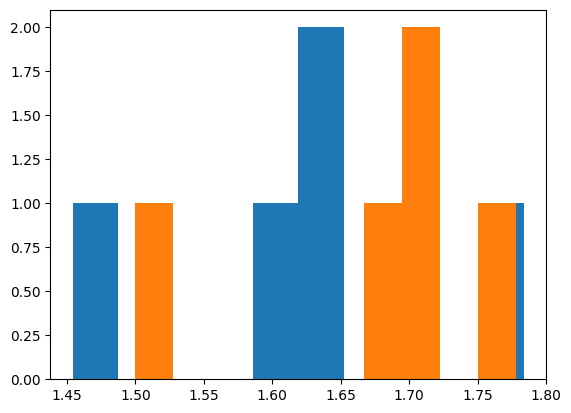

In [442]:
EPRdates1p2=EPRdates[refineEPR1p2G]
EPRdates5=EPRdates[refineEPR5G]
C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F51p2=.23448744 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(RatioB1p2)):
    N=np.append(N,(F51p2/RatioB1p2[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(RatioB1p2)):
    R=np.append(R,1/((F51p2/RatioB1p2[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(RatioB1p2)):
    S=np.append(S,(F51p2/RatioB1p2[i])/((F51p2/RatioB1p2[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(RatioB1p2)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(RatioB1p2)):
    U=np.append(U,S[i]*I3)

adjDS1p2=EPRds1p2*S
EPRdates1p2=EPRdates1p2[np.where(adjDS1p2!=0)]
EPRds1p2=EPRds1p2[np.where(adjDS1p2!=0)]
adjDS1p2=adjDS1p2[np.where(adjDS1p2!=0)]
#adjPC=EPRpc*R
#adjPC=adjPC[np.where(adjPC!=0)]
dsBaseLine1p2=EPRds1p2[np.where(EPRds1p2!=0)]

FinalEPRds1p2=np.mean(adjDS1p2)
FinalEPRdsE1p2=np.std(adjDS1p2)
dsNewHist=plt.hist(adjDS1p2)
dsHist=plt.hist(dsBaseLine1p2)
print(100*np.std(adjDS1p2)/np.mean(adjDS1p2),' ',100*np.std(dsBaseLine1p2)/np.mean(adjDS1p2))

In [443]:

#add on november 12 

#EPRdates1p2=EPRdates[refineEPR1p2G]
#EPRdates5=EPRdates[refineEPR5G]
C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F51p2=.23448744 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(sweepRatios1p2)):
    N=np.append(N,(F51p2/sweepRatios1p2[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(sweepRatios1p2)):
    R=np.append(R,1/((F51p2/sweepRatios1p2[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(sweepRatios1p2)):
    S=np.append(S,(F51p2/sweepRatios1p2[i])/((F51p2/sweepRatios1p2[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(sweepRatios1p2)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(sweepRatios1p2)):
    U=np.append(U,S[i]*I3)
    
newEPRs1p2=FinalEPRds1p2/S

This better be 1.0 -->  1.0


In [444]:
from math import *

In [445]:
FinalEPRdsE1p2/sqrt(11)

0.03181392017010675

In [446]:
len(EPRds1p2)

5

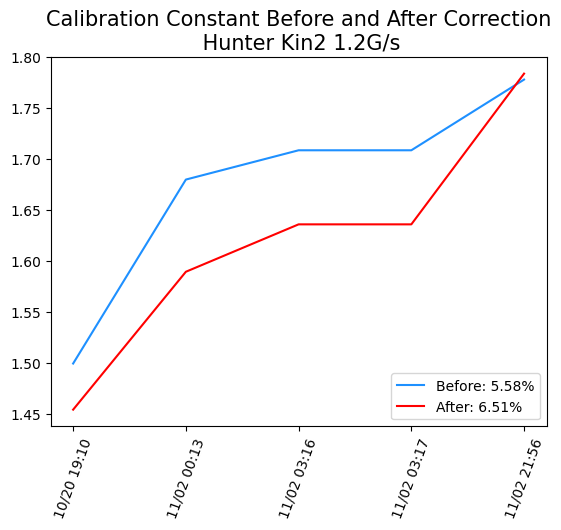

In [447]:
oldPerc=str(np.round(np.std(EPRds1p2)/np.mean(EPRds1p2)*100,2))
newPerc=str(np.round(np.std(adjDS1p2)/np.mean(adjDS1p2)*100,2))
EPRdatetime=np.empty(0)
dateString=np.empty(0)
for i in range(0,len(EPRdates1p2)):
    EPRdatetime=np.append(EPRdatetime,datetime.strptime('2022'+str(EPRdates1p2[i]),'%Y%m%d%H%M'))
    dateString=np.append(dateString,str(EPRdates1p2[i])[:2]+'/'+str(EPRdates1p2[i])[2:4]+' '+str(EPRdates1p2[i])[4:6]+':'+str(EPRdates1p2[i])[6:])

#plt.plot(dateString,EPRds,label='Before',color='dodgerblue')
#plt.plot(dateString,adjDS,label='After',color='red')
plt.plot(dateString,EPRds1p2,label='Before: '+oldPerc+'%',color='dodgerblue')
plt.plot(dateString,adjDS1p2,label='After: '+newPerc+'%',color='red')
plt.legend(loc='lower right')
x=plt.xticks(rotation=70)
plt.title("Calibration Constant Before and After Correction"+'\n Hunter Kin2 1.2G/s',fontsize=15)
plt.savefig('CalCorrectionHunterKin2.png')

### 5G/s

In [448]:
EPRds5=EPRds[refineEPR5G]

In [449]:
RatioB

array([0.25042517, 0.23448744, 0.24677449, 0.22713653, 0.23385892,
       0.23314655, 0.25982668, 0.26178191, 0.26178191, 0.25904397,
       0.25904397, 0.26774771, 0.25875228, 0.26364197, 0.23302165,
       0.25724633, 0.25724633, 0.23276758, 0.23281334, 0.23625347,
       0.23085292, 0.23085292, 0.23388639])

This better be 1.0 -->  1.0
7.5312189974755315   6.245753678398843


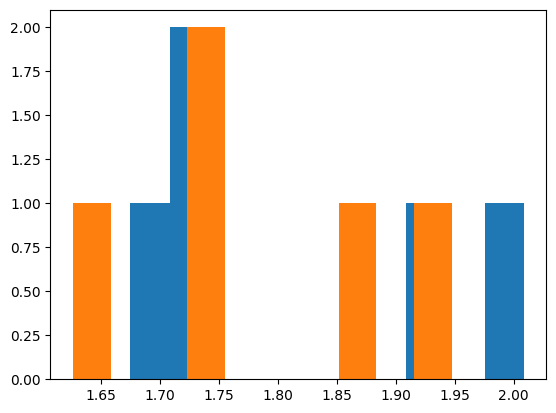

In [450]:

C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.25042517 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(RatioB5)):
    N=np.append(N,(F5/RatioB5[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(RatioB5)):
    R=np.append(R,1/((F5/RatioB5[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(RatioB5)):
    S=np.append(S,(F5/RatioB5[i])/((F5/RatioB5[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(RatioB5)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(RatioB5)):
    U=np.append(U,S[i]*I3)

adjDS5=EPRds5*S
EPRdates5=EPRdates5[np.where(adjDS5!=0)]
EPRds5=EPRds5[np.where(adjDS5!=0)]
adjDS5=adjDS5[np.where(adjDS5!=0)]
#adjPC=EPRpc*R
#adjPC=adjPC[np.where(adjPC!=0)]
dsBaseLine5=EPRds5[np.where(EPRds5!=0)]

FinalEPRds5=np.mean(adjDS5)
FinalEPRdsE5=np.std(adjDS5)
dsNewHist=plt.hist(adjDS5)
dsHist=plt.hist(dsBaseLine5)
print(100*np.std(adjDS5)/np.mean(adjDS5),' ',100*np.std(dsBaseLine5)/np.mean(adjDS5))

In [451]:

#add on november 12 

#EPRdates1p2=EPRdates[refineEPR1p2G]
#EPRdates5=EPRdates[refineEPR5G]
C2=306.1659 #V_PC
C3=44.8700 #V_TT
C4=160.9000 #V_TC
C6=878.7170 #kHz/Gauss
C7=4.8376 #cbar/(kHz/G)
F2=7.38658534932298 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F51p2=.23448744 #ref_ratio

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(sweepRatios5)):
    N=np.append(N,(F51p2/sweepRatios5[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(sweepRatios5)):
    R=np.append(R,1/((F51p2/sweepRatios5[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(sweepRatios5)):
    S=np.append(S,(F51p2/sweepRatios5[i])/((F51p2/sweepRatios5[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(sweepRatios5)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(sweepRatios5)):
    U=np.append(U,S[i]*I3)
    
newEPRs5=FinalEPRds5/S

This better be 1.0 -->  1.0


In [452]:
len(EPRds5)

5

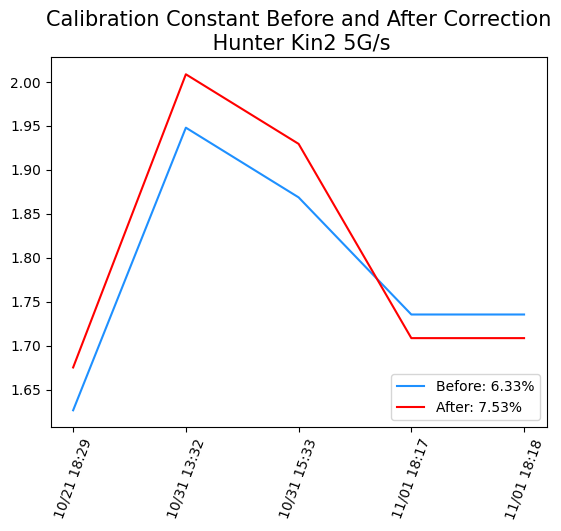

In [453]:
oldPerc=str(np.round(np.std(EPRds5)/np.mean(EPRds5)*100,2))
newPerc=str(np.round(np.std(adjDS5)/np.mean(adjDS5)*100,2))
EPRdatetime=np.empty(0)
dateString=np.empty(0)
for i in range(0,len(EPRdates5)):
    EPRdatetime=np.append(EPRdatetime,datetime.strptime('2022'+str(EPRdates5[i]),'%Y%m%d%H%M'))
    dateString=np.append(dateString,str(EPRdates5[i])[:2]+'/'+str(EPRdates5[i])[2:4]+' '+str(EPRdates5[i])[4:6]+':'+str(EPRdates5[i])[6:])

#plt.plot(dateString,EPRds,label='Before',color='dodgerblue')
#plt.plot(dateString,adjDS,label='After',color='red')
plt.plot(dateString,EPRds5,label='Before: '+oldPerc+'%',color='dodgerblue')
plt.plot(dateString,adjDS5,label='After: '+newPerc+'%',color='red')
plt.legend(loc='lower right')
x=plt.xticks(rotation=70)
plt.title("Calibration Constant Before and After Correction"+'\n Hunter Kin2 5G/s',fontsize=15)
plt.savefig('CalCorrectionHunterKin2.png')

# Take the Density Corrected EPR Calibration and apply it to all NMRs

In [454]:
#1.2G/s

CorrectedRatio1p2=F51p2


CorrectedNMRs1p2=np.empty(0)
newEPRds1p2=np.empty(0)
for i,j in enumerate(H21p2):
    #CorrectedNMRs1p2=np.append(CorrectedNMRs1p2,j*FinalEPRds1p2*sweepRatios1p2[i]/CorrectedRatio1p2)
    CorrectedNMRs1p2=np.append(CorrectedNMRs1p2,j*newEPRs1p2[i])

    newEPRds1p2=np.append(newEPRds1p2,FinalEPRds1p2*CorrectedRatio1p2/sweepRatios1p2[i])

In [455]:
len(CorrectedNMRs1p2)

34

In [456]:
CorrectedRatio5=F5


CorrectedNMRs5=np.empty(0)
newEPRds5=np.empty(0)
for i,j in enumerate(H25):
    #CorrectedNMRs5=np.append(CorrectedNMRs5,j*FinalEPRds5*sweepRatios5[i]/CorrectedRatio5)
    CorrectedNMRs5=np.append(CorrectedNMRs5,j*newEPRs5[i])

    newEPRds5=np.append(newEPRds5,FinalEPRds5*sweepRatios5[i]/CorrectedRatio5)

In [457]:
len(CorrectedNMRs5)

119

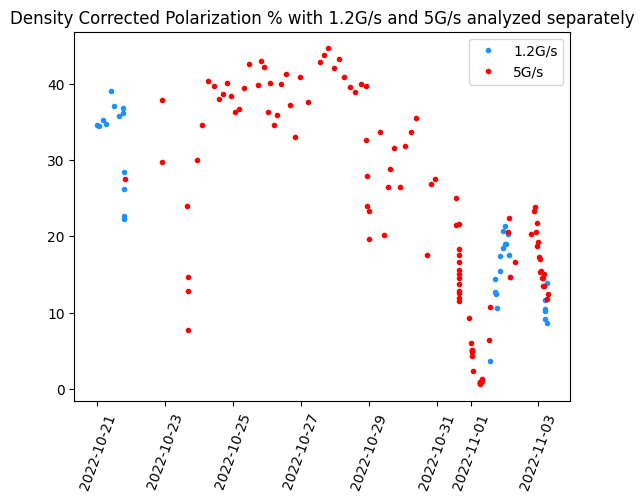

In [458]:
plt.plot(H2dates1p2,CorrectedNMRs1p2,".",color="dodgerblue",label="1.2G/s")
plt.plot(H2dates5[:-4],CorrectedNMRs5[:-4],'.',color="red",label="5G/s")
plt.title("Density Corrected Polarization % with 1.2G/s and 5G/s analyzed separately")
plt.legend(loc="upper right")
x=plt.xticks(rotation=70)


### Create error arrays and variables for FinalEPRds, SweepRatios

In [459]:
np.save("uncorrected1p2.npy",H21p2)
np.savetxt("FinalEPRdsE1p2.txt",[[FinalEPRdsE1p2]])
np.savetxt("FinalEPRds1p2.txt",[FinalEPRds1p2])
np.savetxt("ReferenceRatio1p2.txt",[[CorrectedRatio1p2]])
np.save("newEPRds1p2.npy",newEPRds1p2)
np.save("sweepRatios1p2.npy",sweepRatios1p2)

np.save("uncorrected5.npy",H25[:-4])
np.savetxt("FinalEPRdsE5.txt",[[FinalEPRdsE5]])
np.savetxt("FinalEPRds5.txt",[FinalEPRds5])
np.savetxt("ReferenceRatio5.txt",[[CorrectedRatio5]])
np.save("newEPRds5.npy",newEPRds5[:-4])
np.save("sweepRatios5.npy",sweepRatios5[:-4])

In [460]:
len(sweepRatios[:-4])

156

In [461]:
H2SortedDatesCorrected1p2=H2dates1p2
H2CorrectedDSNMR1p2=CorrectedNMRs1p2

H2SortedDatesCorrected5=H2dates5[:-4]
H2CorrectedDSNMR5=CorrectedNMRs5[:-4]


#H2dates5[:-4],CorrectedNMRs5[:-4]

In [462]:
np.save(sys.path[0]+'/../H2SortedDatesCorrected1p2.npy',H2SortedDatesCorrected1p2)
np.save(sys.path[0]+'/../H2CorrectedDSNMR1p2.npy',H2CorrectedDSNMR1p2)

np.save(sys.path[0]+'/../H2SortedDatesCorrected5.npy',H2SortedDatesCorrected5)
np.save(sys.path[0]+'/../H2CorrectedDSNMR5.npy',H2CorrectedDSNMR5)



In [463]:
allNMRs=np.append(H2CorrectedDSNMR1p2,H2CorrectedDSNMR5)

32.842903946163446

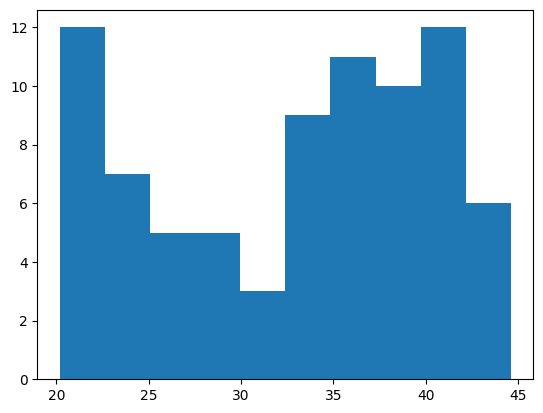

In [464]:
plt.hist(allNMRs[np.where(allNMRs>20)])
np.mean(allNMRs[np.where(allNMRs>20)])

# Looking at Settings

In [465]:
allFits
allIndices
allDates

array(['20221025_171530', '20221022_231115', '20221031_155140',
       '20221103_035654', '20221030_171612', '20221024_014417',
       '20221021_180326', '20221031_153259', '20221022_230831',
       '20221022_222249', '20221029_075930', '20221102_230435',
       '20221101_203142', '20221103_005750', '20221020_171935',
       '20221024_134630', '20221020_233411', '20221101_134048',
       '20221103_063954', '20221101_011358', '20221028_220103',
       '20221027_045538', '20221021_192155', '20221025_041610',
       '20221029_151208', '20221022_043508', '20221027_085405',
       '20221102_190105', '20221021_062218', '20221102_024126',
       '20221026_071359', '20221102_215536', '20221103_045440',
       '20221030_194447', '20221019_210059', '20221101_223714',
       '20221103_021127', '20221031_133110', '20221022_214544',
       '20221101_063849', '20221019_223620', '20221026_045130',
       '20221101_071938', '20221023_200557', '20221103_042858',
       '20221108_100054', '20221020_1027

In [466]:
def GrabSettingsAtIndex(j):
    import os
    import numpy as np
    import pandas as pd
    import re

    
    NMRFolders=os.listdir(NMRData)
    name=NMRData+'/'+NMRFolders[j]+'/Downstream Coil/Settings.dat'
    with open(name, 'r') as f:
        # read the contents of the file into a list
        lines = f.readlines()

    # remove newline characters from each element
    lines = [line.strip() for line in lines]

    # print the list

    result=[]
    for string in lines[4:11]:
        # split the string into key and value
        key, value = string.split(':')
        # strip leading and trailing whitespace from key and value
        key = key.strip()
        value = value.strip()
        # convert value to integer
        value = float(value)
        # add key and value to result list
        result.append([key, value])
    print(lines[13])

    return result

nmrDates=np.load('nmrDates.npy')
nmrIndices=np.load('nmrIndices.npy')

In [467]:
beforeEPRindices
afterEPRindices

array([152.])

In [468]:
bIndices

array([111,  78, 195, 179,  37,   7, 185,  84,  84, 139, 139,  12,  35,
        55, 109, 157, 157,  80,  31, 128,  72,  72,  68])

In [469]:
aIndices

array([142, 131,  47,  87, 190, 124,  17, 118, 118,  53,  53, 119,  88,
        92,  29, 154, 154,  70, 192,  11, 159, 159,  13])

In [470]:
for i in range(0,len(bIndices)):
    GrabSettingsAtIndex(bIndices[i])

Start Time:	2022/10/20 23:34:11
Start Time:	2023/01/16 22:30:34
Start Time:	2022/10/22 04:35:08
Start Time:	2022/10/21 19:21:55
Start Time:	2022/11/15 08:16:53
Start Time:	2023/01/12 18:21:47
Start Time:	2023/02/06 03:08:25
Start Time:	2023/01/23 22:33:11
Start Time:	2023/01/23 22:33:11
Start Time:	2022/11/03 06:39:54
Start Time:	2022/11/03 06:39:54
Start Time:	2023/10/06 00:24:59
Start Time:	2023/09/20 18:12:49
Start Time:	2022/10/06 14:06:37
Start Time:	2023/02/27 11:00:29
Start Time:	2022/10/15 11:48:11
Start Time:	2022/10/15 11:48:11
Start Time:	2023/09/21 16:06:58
Start Time:	2022/11/03 03:56:54
Start Time:	2023/09/13 23:56:11
Start Time:	2023/10/20 11:31:08
Start Time:	2023/10/20 11:31:08
Start Time:	2023/09/17 17:05:08


In [471]:
GrabSettingsAtIndex(845)

Start Time:	2023/10/12 16:57:27


[['Holding Field (G)', 20.958423],
 ['Theta (degree)', 90.0],
 ['Phi (degree)', 64.160487],
 ['High Field (G)', 28.0],
 ['Sweep Speed (G/s)', 4.0],
 ['Sit Time (s)', 0.0],
 ['RF Frequency (kHz)', 91.0]]

In [472]:
vanillaDS=H2[:-4]
densityCorrectedDS=CorrectedNMRs[:-4]
dates=Hsorted_dates2[:-4]

NameError: name 'CorrectedNMRs' is not defined

In [ ]:
plt.plot(dates,vanillaDS)
plt.plot(dates,densityCorrectedDS)

In [ ]:
GrabSettingsAtIndex(int(bIndices[0]))[4][1]

In [ ]:
len(bIndices)

In [ ]:
#Using only calibrations with same settings
refineEPR1p2G=np.empty(0)
refineEPR5G=np.empty(0)
for i in range(0,len(bIndices)):
    x=GrabSettingsAtIndex(int(bIndices[i]))
    if x[4][1]==5:
        refineEPR5G=np.append(refineEPR5G,i)
    if x[4][1]==1.2:
        refineEPR1p2G=np.append(refineEPR1p2G,i)
refineEPR1p2G=refineEPR1p2G.astype(int)
refineEPR5G=refineEPR5G.astype(int)

In [ ]:
refineEPR1p2G

In [ ]:
refineEPR5G

In [ ]:
len(EPRds)

In [ ]:
magFieldBeforeEPR=np.empty(0)
magFieldAfterEPR=np.empty(0)
for i in bIndices:
    magFieldBeforeEPR=np.append(magFieldBeforeEPR,GrabSettingsAtIndex(int(i))[0][1])
for i in aIndices:
    magFieldAfterEPR=np.append(magFieldAfterEPR,GrabSettingsAtIndex(int(i))[0][1])

In [ ]:
magFieldBeforeEPR

In [ ]:
x=plt.hist(magFieldAfterEPR,20)

In [ ]:
len(EPRds)

In [ ]:
len(magFieldBeforeEPR)

In [ ]:
ref=magFieldAfterEPR[8]

In [ ]:
magCorEPR=np.empty(0)
for i in range(0,len(EPRds)):
    if magFieldAfterEPR[i]>10:
        magCorEPR=np.append(magCorEPR,EPRds[i]*(ref/magFieldAfterEPR[i]))

In [ ]:
len(refineEPR)

In [ ]:
len(EPRds)

In [ ]:
EPRds[refineEPR]

In [ ]:
100*np.std(EPRds[refineEPR])/np.mean(EPRds[refineEPR])

In [ ]:
100*np.std(EPRds)/np.mean(EPRds)

In [ ]:
magCorEPR

In [ ]:
np.std(magCorEPR[refineEPR])/np.mean(magCorEPR[refineEPR])

In [ ]:
plt.title("Magnetic Field and EPR Hunter Kin 2")
plt.plot(11*EPRds[refineEPR],'.',label='EPR DS Scaled')
plt.plot(magFieldBeforeEPR,'.',label='Magnetic Field in NMR Measurement Before EPR')
plt.legend(loc='lower right')
plt.xlabel("Arbitrary")
plt.ylabel("Arbitrary")
plt.plot(11*magCorEPR,'.')
#plt.ylim((16,27))

In [ ]:
#next step is to redo corrections with 5g/s